# 데이터 전치리 기초

In [1]:
# 타이타닉 데이터 실습

In [3]:
titanic = sns.load_dataset("titanic")
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [13]:
# missingno로 결측 데이터 찾기

import missingno as msno

msno.matrix(titanic)
plt.show()

ModuleNotFoundError: No module named 'missingno'

In [10]:
from patsy import dmatrix

In [12]:
dmatrix("survived + pclass + age + 0", titanic)

DesignMatrix with shape (714, 3)
  survived  pclass  age
         0       3   22
         1       1   38
         1       3   26
         1       1   35
         0       3   35
         0       1   54
         0       3    2
         1       3   27
         1       2   14
         1       3    4
         1       1   58
         0       3   20
         0       3   39
         0       3   14
         1       2   55
         0       3    2
         0       3   31
         0       2   35
         1       2   34
         1       3   15
         1       1   28
         0       3    8
         1       3   38
         0       1   19
         0       1   40
         0       2   66
         0       1   28
         0       1   42
         0       3   21
         0       3   18
  [684 rows omitted]
  Terms:
    'survived' (column 0)
    'pclass' (column 1)
    'age' (column 2)
  (to view full data, use np.asarray(this_obj))

In [1]:
from sklearn.datasets import make_regression

x, y, w = make_regression(
n_sample=50, n_features=1, bias=100, noise=10, coef=True, random_state)

SyntaxError: positional argument follows keyword argument (<ipython-input-1-b1b864e336e3>, line 4)

In [2]:
from sklearn.datasets import make_regression

In [5]:
def make_regression2(n_samples, bias, noise, random_state=0):
    np.random.seed(random_state)
    x = np.random.normal(size=n_samples)
    w = 100 * np.random.normal(size=1)[0]
    y0 = x * w + bias
    e = np.random.normal(scale=noise, size=n_samples)
    y = y0 + e
    return x, y, w

In [6]:
x, y, w = make_regression2(50, 100, 10)

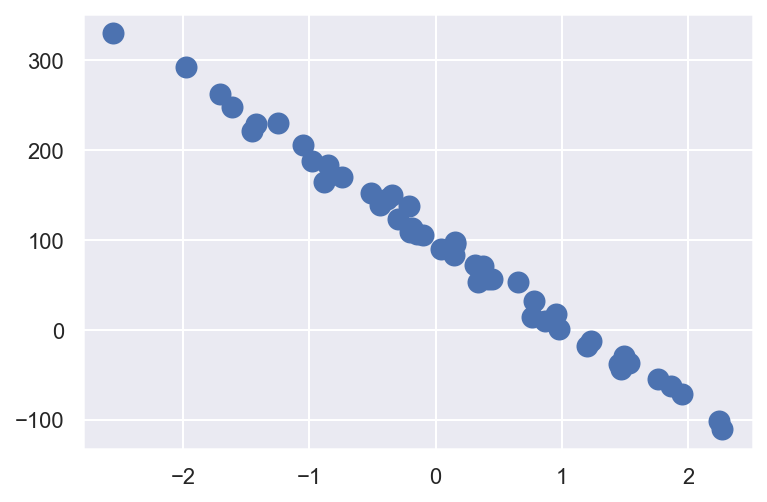

In [9]:
plt.scatter(x, y, s=100)
plt.show()

In [11]:
from sklearn.datasets import make_regression

bias = 100
x0, y, w = make_regression(
    n_samples=200, n_features=1, bias=bias, noise=10, coef=True, random_state=1
)

X = sm.add_constant(x0)
# 상수항 추가

y = y.reshape(len(y), 1)

In [12]:
w

array(86.44794301)

In [13]:
# OLS 해를 직접 이용하는 방법
w = np.linalg.inv(X.T @ X) @ X.T @ y
w

array([[99.79150869],
       [86.96171201]])

In [14]:
# y = 100 + 86.45x + e
# y = 99.79 + 86.96x + e 
# 잡음으로 인해 정확한 값 나오지 않음

In [15]:
# statsmodels OLS 명령
df = pd.DataFrame({"x":x0[:, 0], "y":y[:, 0]})
df

,x,y
0,0.232495,127.879017
1,-0.038696,93.032914
2,0.550537,161.857508
3,0.503185,141.692050
4,2.186980,283.260119
...,...,...
195,-0.172428,87.874277
196,-1.199268,-13.626664
197,1.462108,216.106619
198,1.131629,212.743149


In [16]:
dfy = df[["y"]]
dfx = sm.add_constant(df[["x"]])
model = sm.OLS(dfy, dfx)
result = model.fit()

In [17]:
model = sm.OLS.from_formula("y~x", data=df)
result = model.fit()

In [19]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Fri, 27 Aug 2021   Prob (F-statistic):          8.17e-182
Time:                        16:14:25   Log-Likelihood:                -741.28
No. Observations:                 200   AIC:                             1487.
Df Residuals:                     198   BIC:                             1493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.7915      0.705    141.592      0.0

In [20]:
model = OLS.from_formula(formula, data=df)
model = OLS(dfy, dfx)
result = model.fit()
print(result.summary())
y_new = result.predict(x_new)

NameError: name 'OLS' is not defined

In [21]:
result.predict({"x":[-2, -1, 0, 1, 2]})

0    -74.131915
1     12.829797
2     99.791509
3    186.753221
4    273.714933
dtype: float64

In [22]:
result.params
# 가중치 벡터

Intercept    99.791509
x            86.961712
dtype: float64

In [23]:
result.resid
# 잔차 벡터

0       7.869384
1      -3.393567
2      14.190317
3      -1.857271
4      -6.714883
         ...    
195     3.077420
196    -9.127772
197   -10.832299
198    14.543212
199     7.161656
Length: 200, dtype: float64

### 보스턴 집값 예측

In [24]:
from sklearn.datasets import load_boston

boston = load_boston()

In [25]:
dfx0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfx = sm.add_constant(dfx0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

In [26]:
model_boston2 = sm.OLS(dfy, dfx)
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 27 Aug 2021   Prob (F-statistic):          6.72e-135
Time:                        16:22:42   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

In [27]:
# 두번째 방법

dfx = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df= pd.concat([dfx, dfy], axis=1)

model1 = sm.OLS.from_formula("MEDV ~" + "+".join(boston.feature_names), data=df)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 27 Aug 2021   Prob (F-statistic):          6.72e-135
Time:                        16:29:17   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

In [28]:
# 조건수가 너무 커서(2번 경고) 표준편차를 확인해 봄
dfx.describe().loc["std"]

CRIM         8.601545
ZN          23.322453
INDUS        6.860353
CHAS         0.253994
NOX          0.115878
RM           0.702617
AGE         28.148861
DIS          2.105710
RAD          8.707259
TAX        168.537116
PTRATIO      2.164946
B           91.294864
LSTAT        7.141062
Name: std, dtype: float64

In [30]:
# 스케일링으로 조건수 작게 하기
feature_names = list(boston.feature_names)
feature_names.remove("CHAS")
feature_names = ["scale({})".format(name) for name in feature_names] + ["CHAS"]
model3 = sm.OLS.from_formula("MEDV ~ " + "+".join(feature_names), data=df)
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 27 Aug 2021   Prob (F-statistic):          6.72e-135
Time:                        16:46:40   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         22.3470      0.219    101.

In [31]:
import seaborn as sns

In [32]:
titanic =sns.load_dataset('titanic')

In [33]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [34]:
titanic_processed = titanic.dropna()

In [35]:
titanic_processed.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True
